In [29]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from template_lab1 import *

In [33]:
names = ["genesis", "cproglang", "othello"]

In [36]:
# general information about the text
# (vraag a.)
datas = [list(open(f"texts/{n}.txt", "r").read()) for n in names]

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 6467: character maps to <undefined>

In [37]:
lengths = [len(d) for d in datas]
charprobss = []
for d in datas:
    chars, charcnts = np.unique(d, return_counts=True)
    charprobs = charcnts / np.sum(charcnts)
    charprobss.append((chars, charprobs))

NameError: name 'datas' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


genesis:
   text length: 207327
   amount of characters: 71


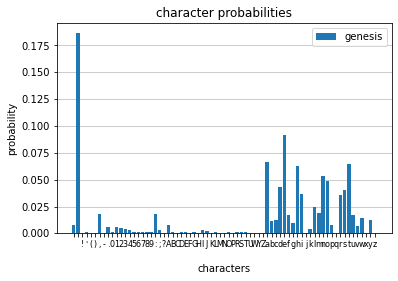

cproglang:
   text length: 432963
   amount of characters: 111


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


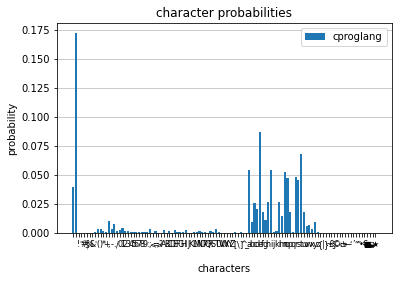

othello:
   text length: 153428
   amount of characters: 73


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


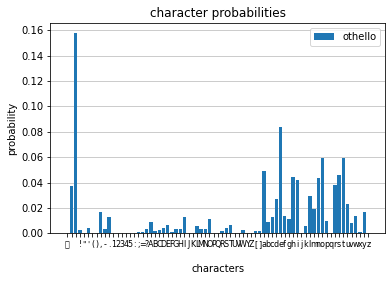

In [ ]:
for i,n in enumerate(names):
    print(f"{n}:")
    print('   text length:', lengths[i])
    
    chars, charprobs = charprobss[i]
    print('   amount of characters:', len(charprobss[i][0]))

    fig,ax = plt.subplots()
    ax.bar(chars, charprobs, label=n)
    plt.rc('xtick', labelsize=8)
    drawplot(f"../report/images/{n}_probs", "character probabilities", "characters", "probability", ax)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


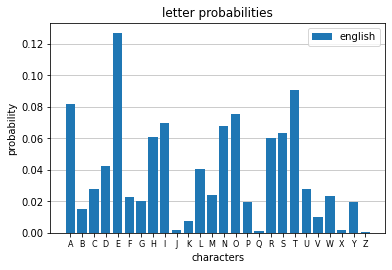

In [ ]:
# English
# (vraag b.)

# we could only find information about the letter distribution of
# average english (no punctuation)

english, englishprobs = zip(* np.genfromtxt("eng_probs.csv", delimiter=",", dtype=None, skip_header=True, encoding='UTF-8'))
english, englishprobs = list(english), list(englishprobs)

fig,ax = plt.subplots()
ax.bar(english, englishprobs, label="english")
drawplot("../report/images/english_probs", "letter probabilities", "characters", "probability", ax)

In [ ]:
# to make a fair comparison we need to filter our text to only 
# letters

filtereddatas = [onlyletters(d) for d in datas]

NameError: name 'datas' is not defined

In [ ]:
filteredlengths = [len(d) for d in filtereddatas]

letterss = []
for d in filtereddatas:
    letters, lettercnts = np.unique(d, return_counts=True)
    letterprobs = lettercnts / np.sum(lettercnts)
    letterss.append((letters, letterprobs))

NameError: name 'filtereddatas' is not defined

In [ ]:
assert(len(letters) == len(english) == 26)  

width = 0.4
xaxis = np.arange(26)

for i,n in enumerate(names):
    letters, letterprobs = letterss[i]
    fig,ax = plt.subplots()
    plt.bar(xaxis - width/2, englishprobs, width=width, label="english")
    plt.bar(xaxis + width/2, letterprobs, width=width, label=n)
    plt.xticks(xaxis, letters)
    drawplot(f"../report/images/{n}_eng_probs", "character probability comparison", "letters", "probability", ax)

NameError: name 'letters' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


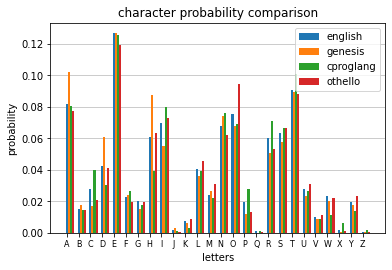

In [ ]:
width = 0.7/(len(names) + 1)

fig,ax = plt.subplots()
plt.bar(xaxis, englishprobs, width=width, label="english")
for i,n in enumerate(names):
    letters, letterprobs = letterss[i]
    plt.bar(xaxis + (i + 1)*width, letterprobs, width=width, label=n)
plt.xticks(xaxis, letterss[0][0])
drawplot(f"../report/images/together_eng_probs", "character probability comparison", "letters", "probability", ax)

In [ ]:
width = 0.7/len(names)

fig,ax = plt.subplots()
for i,n in enumerate(names):
    letters, letterprobs = letterss[i]
    diff = englishprobs - letterprobs
    plt.bar(xaxis + i*width, diff, width=width, label=f"english - {n}")
plt.xticks(xaxis, letterss[0][0])
drawplot(f"../report/images/together_eng_probs_diff", "character probability comparison", "letters", "probability", ax)

NameError: name 'plt' is not defined

In [ ]:
for i,n in enumerate(names):
    letters, letterprobs = letterss[i]
    print(f"{n}:") 
    diff = englishprobs - letterprobs
    print(f"  average difference: {np.mean(diff):.10e}")
    fig,ax = plt.subplots()
    plt.bar(letters, diff, label=f"english - {n}")
    drawplot(f"../report/images/{n}_eng_probs_diff", "character probability comparison", "letters", "probability", ax)

NameError: name 'letterss' is not defined

In [ ]:
# after taking a look at the character distributions, we can 
# take a look at the entropy with different memory sizes

# we do this for both the original and the filtered version of text

# (vraag c.)

maxmem = 10

datas = [list(open(f"texts/{n}.txt", "r").read()) for n in names]
ess = [[get_entropy(d, mem) for mem in range(maxmem)] for d in datas]

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 6467: character maps to <undefined>

In [ ]:
fig,ax = plt.subplots()
for i,es in enumerate(ess):
    ax.plot(es, label=names[i])
drawplot(f"../report/images/together_entropy", "entropy with variable memory", "memory", "entropy (bits)", ax)

NameError: name 'plt' is not defined

In [ ]:
# we want to compare a compressed text with a non compressed text

compresseddatas = [list(open(f"texts/{n}.7z", "rb").read()) for n in names]
escs = [[get_entropy(d, mem) for mem in range(maxmem)] for d in compresseddatas]

# we want to compare with the original text, in order for it to
# be a fair comparison we need to also read it in as bytes

bytesdatas = [list(open(f"texts/{n}.txt", "rb").read()) for n in names]
esbs = [[get_entropy(d, mem) for mem in range(maxmem)] for d in bytesdatas]

NameError: name 'np' is not defined

In [ ]:
for i,n in enumerate(names):
    fig,ax = plt.subplots()
    ax.plot(esbs[i], label=f"{n} uncompressed")
    ax.plot(escs[i], label=f"{n} compressed")
    drawplot(f"../report/images/{n}_compressed_entropy", "entropy comparison of before and after compression with 7z", "memory", "entropy (bits)", ax)
    
fig,ax = plt.subplots()
for i,n in enumerate(names):
    ax.plot(esbs[i], label=f"{n} uncompressed")
    ax.plot(escs[i], label=f"{n} compressed")
drawplot(f"../report/images/together_compressed_entropy", "entropy comparison of before and after compression with 7z", "memory", "entropy (bits)", ax)

NameError: name 'plt' is not defined

In [ ]:
fig,ax = plt.subplots()
plt.yscale('log')
for i,n in enumerate(names):
    ax.plot(esbs[i], label=f"{n} uncompressed")
    ax.plot(escs[i], label=f"{n} compressed")
drawplot(f"../report/images/together_compressed_entropy_logscale", "entropy comparison of before and after compression with 7z", "memory", "entropy (bits)", ax)

NameError: name 'plt' is not defined